In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('tmdb-movies.csv')

In [3]:
df.columns

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj'],
      dtype='object')

In [4]:
df.drop(['id', 'imdb_id', 'homepage'], axis = 1, inplace = True)

In [5]:
df.drop('overview', axis = 1, inplace = True)

In [6]:
df.drop('tagline', axis = 1, inplace = True)

In [7]:
type(df['release_date'][0])

str

In [8]:
df.head(2)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [18]:
action = df['genres'].str.count('Action').sum()

2385.0

In [4]:
df = pd.read_csv('cleaned.csv')

In [43]:
df_cast=df.copy()

In [44]:
df_cast = df_cast.drop('cast', axis=1).join(df_cast['cast'].str.split('|', expand = True).stack().reset_index(level=1, drop = True).rename('cast'))

In [45]:
df_cast[['original_title', 'cast']].head()

,original_title,cast
0,Jurassic World,Chris Pratt
0,Jurassic World,Bryce Dallas Howard
0,Jurassic World,Irrfan Khan
0,Jurassic World,Vincent D'Onofrio
0,Jurassic World,Nick Robinson


In [46]:
df_cast = df_cast.groupby('cast').count()

In [55]:
df_cast.reset_index()

,cast,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,Larry Mullen Jr.,2,0,0,2,2,2,2,2,1,2,2,2,2,0,0,2
1,Nicole MuÃ±oz,1,0,0,1,1,0,1,1,0,1,1,1,1,0,0,1
2,Therese Giehse,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1
3,"""Weird Al"" Yankovic",1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
4,50 Cent,12,9,5,12,12,8,12,12,12,12,12,12,12,9,5,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19021,Äá»— Thá»‹ Háº£i Yáº¿n,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
19022,Å arÅ«nas Bartas,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1
19023,Åžafak Sezer,1,0,0,1,1,0,1,0,0,1,1,1,1,0,0,1
19024,à¸ªà¸£à¸žà¸‡à¸©à¹Œ à¸Šà¸²à¸•à¸£à¸µ,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


In [62]:
df_cast.to_csv('cast.csv', index = None)

In [51]:
df_cast.head()

,popularity,budget,revenue,original_title,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
cast,,,,,,,,,,,,,,,,
Larry Mullen Jr.,2,0,0,2,2,2,2,2,1,2,2,2,2,0,0,2
Nicole MuÃ±oz,1,0,0,1,1,0,1,1,0,1,1,1,1,0,0,1
Therese Giehse,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,1
"""Weird Al"" Yankovic",1,1,0,1,1,1,1,1,1,1,1,1,1,1,0,1
50 Cent,12,9,5,12,12,8,12,12,12,12,12,12,12,9,5,12


In [9]:
df['release_month'] = df['release_date'].str.split('/').str[0].astype(int)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10866 non-null  float64
 1   budget                10866 non-null  int64  
 2   revenue               10866 non-null  int64  
 3   original_title        10866 non-null  object 
 4   cast                  10790 non-null  object 
 5   director              10822 non-null  object 
 6   keywords              9373 non-null   object 
 7   runtime               10866 non-null  int64  
 8   genres                10843 non-null  object 
 9   production_companies  9836 non-null   object 
 10  release_date          10866 non-null  object 
 11  vote_count            10866 non-null  int64  
 12  vote_average          10866 non-null  float64
 13  release_year          10866 non-null  int64  
 14  budget_adj            10866 non-null  float64
 15  revenue_adj        

In [11]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000
mean,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07,6.827259
std,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08,3.441802
min,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00,1.000000
25%,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00,4.000000
50%,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00,7.000000
75%,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07,10.000000
max,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09,12.000000


In [12]:
## make 0 into Nan
cols = ['budget', 'revenue', 'runtime', 'budget_adj', 'revenue_adj']
df[cols] = df[cols].replace({0:np.nan})

In [211]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,10866.00,5170.00,4850.00,10835.00,10866.00,10866.00,10866.00,5170.00,4850.00,10866.00
mean,0.65,30739432.90,89220658.32,102.36,217.39,5.97,2001.32,36887736.70,115077354.87,6.83
std,1.00,38900651.75,162068389.38,30.95,575.62,0.94,12.81,41957008.14,198841916.05,3.44
min,0.00,1.00,2.00,2.00,10.00,1.50,1960.00,0.92,2.37,1.00
25%,0.21,6000000.00,7708081.25,90.00,17.00,5.40,1995.00,8102293.07,10462622.84,4.00
50%,0.38,17000000.00,31826540.00,99.00,38.00,6.00,2006.00,22722708.52,43927485.55,7.00
75%,0.71,40000000.00,99918234.25,112.00,145.75,6.60,2011.00,50074830.91,131564380.45,10.00
max,32.99,425000000.00,2781505847.00,900.00,9767.00,9.20,2015.00,425000000.00,2827123750.41,12.00


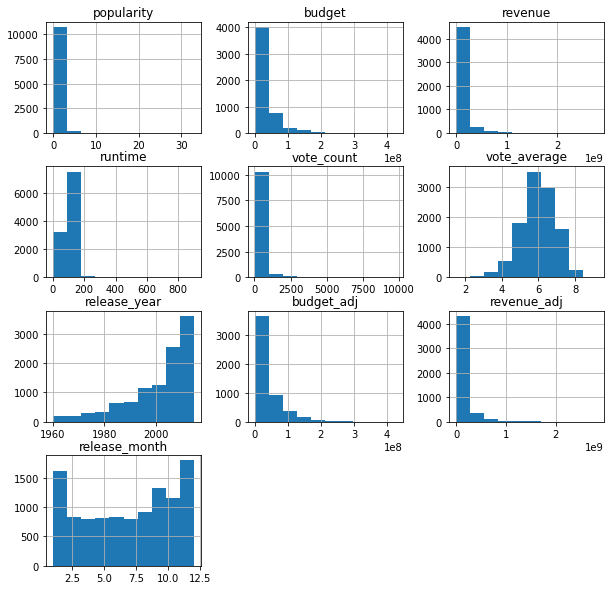

In [14]:
df.hist(figsize = (10,10));

In [15]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
popularity,1.000000,0.479958,0.629316,0.136901,0.800828,0.209511,0.089801,0.435341,0.561760,0.043243
budget,0.479958,1.000000,0.688548,0.265416,0.580043,0.092007,0.215388,0.959131,0.533497,0.046832
revenue,0.629316,0.688548,1.000000,0.237811,0.764122,0.206958,0.121289,0.657577,0.905011,0.043085
runtime,0.136901,0.265416,0.237811,1.000000,0.162607,0.154798,-0.112271,0.329267,0.263979,0.070388
vote_count,0.800828,0.580043,0.764122,0.162607,1.000000,0.253823,0.107948,0.523479,0.666509,0.026299
vote_average,0.209511,0.092007,0.206958,0.154798,0.253823,1.000000,-0.117632,0.112248,0.242429,0.073210
release_year,0.089801,0.215388,0.121289,-0.112271,0.107948,-0.117632,1.000000,0.036619,-0.099530,-0.047026
budget_adj,0.435341,0.959131,0.657577,0.329267,0.523479,0.112248,0.036619,1.000000,0.570466,0.073815
revenue_adj,0.561760,0.533497,0.905011,0.263979,0.666509,0.242429,-0.099530,0.570466,1.000000,0.062103
release_month,0.043243,0.046832,0.043085,0.070388,0.026299,0.073210,-0.047026,0.073815,0.062103,1.000000


In [24]:
df.to_csv('cleaned.csv', index = False)

In [25]:
df = pd.read_csv('cleaned.csv')

In [90]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 


In [41]:
df.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,33,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6,2015,137999939,1392445893,6
1,28,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7,2015,137999939,348161292,5
2,13,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6,2015,101199955,271619025,3
3,11,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,8,2015,183999919,1902723130,12
4,9,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7,2015,174799923,1385748801,4


In [43]:
df.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,10866,5170,4850,10835,10866,10866,10866,5170,4850,10866
mean,1,30739433,89220658,102,217,6,2001,36887737,115077355,7
std,1,38900652,162068389,31,576,1,13,41957008,198841916,3
min,0,1,2,2,10,2,1960,1,2,1
25%,0,6000000,7708081,90,17,5,1995,8102293,10462623,4
50%,0,17000000,31826540,99,38,6,2006,22722709,43927486,7
75%,1,40000000,99918234,112,146,7,2011,50074831,131564380,10
max,33,425000000,2781505847,900,9767,9,2015,425000000,2827123750,12


In [49]:
df[df['budget'] < 5]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
1151,0,1,nan,Fear Clinic,Thomas Dekker|Robert Englund|Cleopatra Coleman...,Robert Hall,phobia|doctor|fear,95,Horror,Dry County Films|Anchor Bay Entertainment|Movi...,10/31/14,15,4,2014,1,nan,10
2398,0,3,43,Boy,James Rolleston|Craig Hall|Taika Waititi|Te Ah...,Taika Waititi,new zealand|maori|farm|goat|duringcreditsstinger,87,Drama|Comedy,New Zealand Film Commission|Unison Films|Whenu...,2/14/10,26,7,2010,3,43,2
2618,0,1,100,Lost & Found,David Spade|Sophie Marceau|Ever Carradine|Step...,Jeff Pollack,restaurant|neighbor|dog|ring,95,Comedy|Romance,Alcon Entertainment|Dinamo Entertainment,4/23/99,14,5,1999,1,131,4
3065,0,1,nan,"Angus, Thongs and Perfect Snogging",Georgia Groome|Eleanor Tomlinson|Aaron Taylor-...,Gurinder Chadha,adolescence|parents kids relationship|becoming...,100,Comedy|Drama|Family|Romance,Paramount Pictures|Nickelodeon Movies|Stella-d...,7/25/08,146,6,2008,1,nan,7
3581,1,1,1378,"Love, Wedding, Marriage",Mandy Moore|Kellan Lutz|Jessica Szohr|Autumn F...,Dermot Mulroney,wedding vows|marriage|love,90,Comedy|Romance,120dB Films|Scion Films|Voodoo Production Serv...,6/3/11,55,5,2011,1,1336,6
3765,0,3,nan,Death of a Superhero,Andy Serkis|Thomas Brodie-Sangster|Michael McE...,Ian Fitzgibbon,NaN,97,Animation|Drama,Bavaria Pictures|Grand Pictures|Picture Circle,5/4/11,30,6,2011,3,nan,5
8944,0,2,16,Death Wish 2,Charles Bronson|Jill Ireland|Vincent Gardenia|...,Michael Winner,rape|detective|drug traffic|vigilante|revenge,88,Action|Crime|Thriller,Cannon Films,2/20/82,27,6,1982,5,36,2
10050,0,3,16,Tales from the Darkside: The Movie,Rae Dawn Chong|Christian Slater|Deborah Harry|...,John Harrison,anthology|based on tv series|darkside|antholog...,93,Fantasy|Horror|Comedy,Paramount Pictures|Laurel Productions|Darkside...,5/3/90,37,6,1990,5,27,5


In [51]:
#Taika Waititi's boy says budjet as "3", but according to the 
#n scenario that would be perfect for a film script, Taika Waititi has just 12 days to raise over $63,000 so he can release his movie Boy in the United States.
#Using the funding website Kickstarter, the Kiwi director has already raised $23,000 of the $90,000 he needs to get the movie released.

In [52]:
df[df['revenue'] < 5]

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
1380,0,nan,3,The Sentinel,Chris Sarandon|Cristina Raines|Martin Balsam|J...,Michael Winner,secret society|hell|hellgate|model|demon,92,Horror|Drama|Mystery,Universal Pictures,1/7/77,14,6,1977,nan,11,1
3239,0,200000,3,Dr. Horrible's Sing-Along Blog,Neil Patrick Harris|Nathan Fillion|Felicia Day...,Joss Whedon,musical|supervillain,42,Adventure|Action|Comedy|Science Fiction|Music,NaN,7/15/08,140,8,2008,202557,3,7
5067,0,6000000,2,Shattered Glass,Hayden Christensen|Peter Sarsgaard|ChloÃ« Sevi...,Billy Ray,NaN,94,Drama|History,Lions Gate Films|Cruise/Wagner Productions|Bau...,11/14/03,46,6,2003,7112116,2,11
8142,1,6000000,2,Mallrats,Jason Lee|Jeremy London|Shannen Doherty|Claire...,Kevin Smith,sex|game show|slacker|comic|shopping,94,Romance|Comedy,Gramercy Pictures|Alphaville Films|View Askew ...,10/20/95,201,7,1995,8585801,3,10
10607,1,nan,3,Soylent Green,Charlton Heston|Edward G. Robinson|Leigh Taylo...,Richard Fleischer,paranoia|dystopia|overpopulation|near future,97,Mystery|Science Fiction|Thriller,Metro-Goldwyn-Mayer (MGM),4/19/73,124,7,1973,nan,15,4


In [53]:
#based on wiki pedia , kevin smith mallrats  $2.1 million

### below is finding

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [68]:
df = pd.read_csv('cleaned.csv')

In [18]:
df.corr()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
popularity,1.000000,0.479958,0.629316,0.136901,0.800828,0.209511,0.089801,0.435341,0.561760,0.043243
budget,0.479958,1.000000,0.688548,0.265416,0.580043,0.092007,0.215388,0.959131,0.533497,0.046832
revenue,0.629316,0.688548,1.000000,0.237811,0.764122,0.206958,0.121289,0.657577,0.905011,0.043085
runtime,0.136901,0.265416,0.237811,1.000000,0.162607,0.154798,-0.112271,0.329267,0.263979,0.070388
vote_count,0.800828,0.580043,0.764122,0.162607,1.000000,0.253823,0.107948,0.523479,0.666509,0.026299
vote_average,0.209511,0.092007,0.206958,0.154798,0.253823,1.000000,-0.117632,0.112248,0.242429,0.073210
release_year,0.089801,0.215388,0.121289,-0.112271,0.107948,-0.117632,1.000000,0.036619,-0.099530,-0.047026
budget_adj,0.435341,0.959131,0.657577,0.329267,0.523479,0.112248,0.036619,1.000000,0.570466,0.073815
revenue_adj,0.561760,0.533497,0.905011,0.263979,0.666509,0.242429,-0.099530,0.570466,1.000000,0.062103
release_month,0.043243,0.046832,0.043085,0.070388,0.026299,0.073210,-0.047026,0.073815,0.062103,1.000000


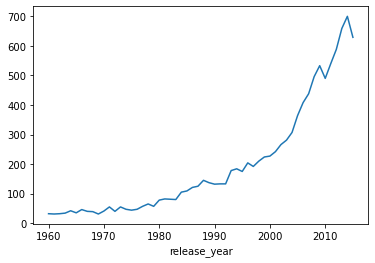

In [44]:
df.groupby('release_year').count().original_title.plot().hist;

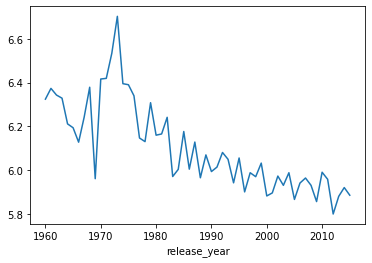

In [38]:
df.groupby('release_year').mean().vote_average.plot();

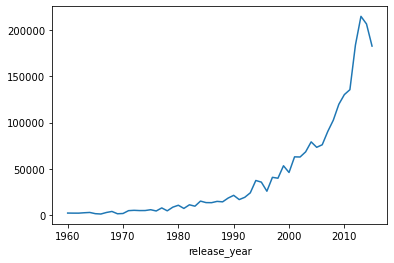

In [39]:
df.groupby('release_year').sum().vote_count.plot();

In [ ]:
## there is more film reistered and more vote in recent yeares, but the avg_ rate is lower.

In [205]:
df_bud= df.dropna()

In [207]:
df_bud.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,6


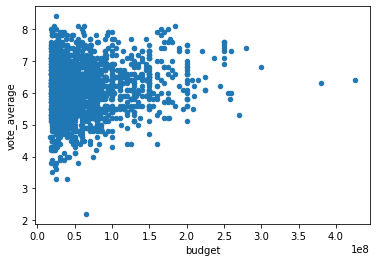

In [212]:
df_bud[df_bud['budget']>17000000.00].plot(kind='scatter', x = 'budget', y = 'vote_average');

#50 %tile hgher budget will reduce lower rate, however it doesnt also mean hhigher average.

In [ ]:
#budjet でラベルをつけよう。

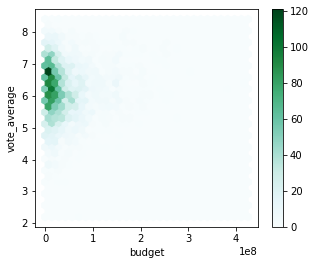

In [67]:
df_bud.plot.hexbin(x = 'budget', y = 'vote_average', gridsize = 30, sharex = False, figsize = (5,4));

In [68]:
df_bud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3678 entries, 0 to 10848
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            3678 non-null   float64
 1   budget                3678 non-null   float64
 2   revenue               3678 non-null   float64
 3   original_title        3678 non-null   object 
 4   cast                  3678 non-null   object 
 5   director              3678 non-null   object 
 6   keywords              3678 non-null   object 
 7   runtime               3678 non-null   float64
 8   genres                3678 non-null   object 
 9   production_companies  3678 non-null   object 
 10  release_date          3678 non-null   object 
 11  vote_count            3678 non-null   int64  
 12  vote_average          3678 non-null   float64
 13  release_year          3678 non-null   int64  
 14  budget_adj            3678 non-null   float64
 15  revenue_adj         

In [69]:
df_bud.describe()

,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
count,3678.000000,3.678000e+03,3.678000e+03,3678.000000,3678.000000,3678.000000,3678.000000,3.678000e+03,3.678000e+03,3678.000000
mean,1.225880,3.811245e+07,1.114105e+08,109.556552,547.583197,6.182436,2001.094345,4.538375e+07,1.420504e+08,7.049483
std,1.498729,4.267018e+07,1.793474e+08,19.854487,894.862105,0.789743,11.379792,4.518652e+07,2.194983e+08,3.362635
min,0.010335,1.000000e+00,2.000000e+00,26.000000,10.000000,2.200000,1960.000000,9.693980e-01,2.861934e+00,1.000000
25%,0.481364,1.000000e+07,1.489561e+07,96.000000,78.000000,5.700000,1995.000000,1.381637e+07,2.038559e+07,4.000000
50%,0.829585,2.500000e+07,4.804570e+07,106.000000,218.500000,6.200000,2004.000000,3.105061e+07,6.548580e+07,7.000000
75%,1.410847,5.000000e+07,1.297594e+08,119.750000,595.500000,6.700000,2010.000000,6.214554e+07,1.704382e+08,10.000000
max,32.985763,4.250000e+08,2.781506e+09,338.000000,9767.000000,8.400000,2015.000000,4.250000e+08,2.827124e+09,12.000000


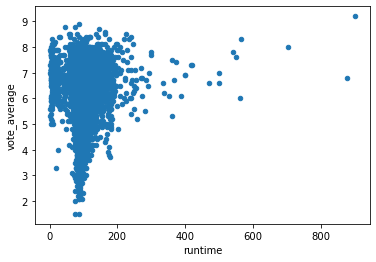

In [72]:
df.plot(kind = 'scatter', x = 'runtime', y = 'vote_average');

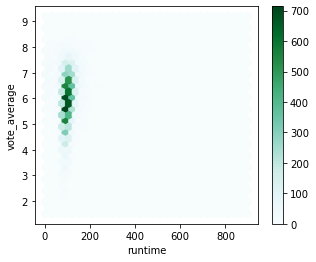

In [73]:
df.plot.hexbin(x = 'runtime', y = 'vote_average', gridsize = 30, sharex = False, figsize = (5,4));

In [79]:
df_cast = df[['cast','original_title','vote_average']]

In [69]:
df_cast

,original_title,vote_average,cast
0,Jurassic World,6,Chris Pratt
1,Mad Max: Fury Road,7,Bryce Dallas Howard
2,Insurgent,6,Irrfan Khan
3,Star Wars: The Force Awakens,8,Vincent D'Onofrio
4,Furious 7,7,Nick Robinson
...,...,...,...
10861,The Endless Summer,7,Peter Plaugborg
10862,Grand Prix,6,Patricia Schumann
10863,Beregis Avtomobilya,6,Tahmoh Penikett
10864,"What's Up, Tiger Lily?",5,Mark Deklin


In [80]:
df_cast = df_cast.drop('cast', axis=1).join(df_cast['cast'].str.split('|', expand = True).stack().rename('cast').reset_index(drop = True))

In [91]:
df_cast.groupby('cast').count().sort_values(by = 'original_title', ascending = False)

,original_title,vote_average
cast,,
Liam Neeson,14,14
Justin Long,14,14
Samuel L. Jackson,12,12
Nicolas Cage,12,12
James Franco,12,12
...,...,...
Iko Uwais,1,1
Igor Jijikine,1,1
Iggy Pop,1,1


In [73]:
df_cast[['cast', 'vote_average']].groupby('cast').mean().sort_values(by = 'vote_average', ascending = False)

,vote_average
cast,
Percy Daggs III,9
Benjamin Kanes,9
Reese Mishler,9
Aiden Flowers,9
Tad Hilgenbrink,8
...,...
Joss Whedon,2
Jeremy Allen White,2
Dean Cates,2


In [86]:
df_cast2 = df_cast.groupby('cast')['original_title'].count().to_frame(name = 'number_of_title').reset_index()

In [87]:
df_cast2.head()

,cast,number_of_title
0,50 Cent,3
1,A Martinez,1
2,AJ Bowen,2
3,Aamir Khan,1
4,Aaron Abrams,1


In [92]:
df_cast3 = df_cast.groupby('cast')['vote_average'].mean().to_frame(name = 'vote_average').reset_index()

In [95]:
df_cast3.head()

,cast,vote_average
0,50 Cent,6.40
1,A Martinez,5.50
2,AJ Bowen,5.85
3,Aamir Khan,6.60
4,Aaron Abrams,6.50


In [104]:
df_cast_clean = df_cast2.merge(df_cast3, how = 'outer').fillna(0)

In [109]:
df_cast_clean.sort_values(by = 'number_of_title', ascending = False)

,cast,number_of_title,vote_average
3821,Liam Neeson,14,6.38
3327,Justin Long,14,6.11
5452,Samuel L. Jackson,12,6.22
4699,Nicolas Cage,12,5.73
2648,James Franco,12,6.27
...,...,...,...
2486,Iko Uwais,1,7.20
2484,Igor Jijikine,1,6.10
2483,Iggy Pop,1,5.80
2482,Igal Naor,1,5.90


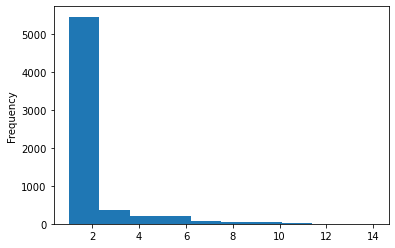

In [143]:
df_cast_clean['number_of_title'].plot(kind = 'hist');

In [138]:
df_cast_clean[df_cast_clean['number_of_title'] > 10].sort_values(by = 'vote_average', ascending = False)

,cast,number_of_title,vote_average
3821,Liam Neeson,14,6.38
797,Brendan Gleeson,11,6.29
2648,James Franco,12,6.27
5452,Samuel L. Jackson,12,6.22
5434,Sam Rockwell,11,6.12
3327,Justin Long,14,6.11
3627,Kristen Wiig,11,6.05
2915,Jessica Chastain,11,5.95
190,Alfred Molina,11,5.95
2658,James Marsden,11,5.87


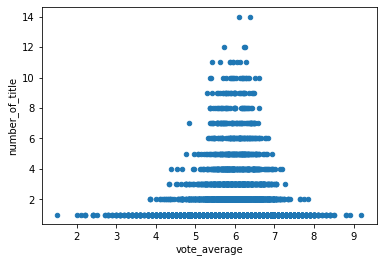

In [111]:
df_cast_clean.plot(kind = 'scatter', x = 'vote_average', y = 'number_of_title');

In [114]:
df_cast_clean.describe()

,number_of_title,vote_average
count,6434.00,6434.00
mean,1.69,5.97
std,1.52,0.85
min,1.00,1.50
25%,1.00,5.50
50%,1.00,6.00
75%,2.00,6.50
max,14.00,9.20


##director

In [115]:
df_dir =  df[['director','original_title','vote_average']]

In [116]:
df_dir.head()

,director,original_title,vote_average
0,Colin Trevorrow,Jurassic World,6.50
1,George Miller,Mad Max: Fury Road,7.10
2,Robert Schwentke,Insurgent,6.30
3,J.J. Abrams,Star Wars: The Force Awakens,7.50
4,James Wan,Furious 7,7.30


In [120]:
df_dir.groupby('director').count().sort_values(by='original_title', ascending = False)

,original_title,vote_average
director,,
Woody Allen,45,45
Clint Eastwood,34,34
Steven Spielberg,29,29
Martin Scorsese,29,29
Ridley Scott,23,23
...,...,...
James Healey,1,1
James Hill,1,1
James Honeyborne,1,1


In [127]:
df_dir2 = df_dir.groupby('director')['original_title'].count().to_frame(name = 'number_of_title').reset_index()

In [128]:
df_dir2.head()

,director,number_of_title
0,FrÃ©dÃ©ric Jardin,1
1,A. Todd Smith,1
2,A.R. Murugadoss,1
3,Aaron Aites,1
4,Aaron Blaise|Robert Walker,1


In [123]:
df_dir3 = df_dir.groupby('director')['vote_average'].mean().to_frame(name = 'vote_average').reset_index()

In [129]:
df_dir3.head()

,director,vote_average
0,FrÃ©dÃ©ric Jardin,5.90
1,A. Todd Smith,5.40
2,A.R. Murugadoss,6.90
3,Aaron Aites,6.50
4,Aaron Blaise|Robert Walker,6.80


In [130]:
df_dir_clean = df_dir2.merge(df_dir3, how = 'outer').fillna(0)

In [132]:
df_dir_clean.sort_values(by = 'number_of_title', ascending = False)

,director,number_of_title,vote_average
4999,Woody Allen,45,6.44
878,Clint Eastwood,34,6.51
4601,Steven Spielberg,29,6.82
3175,Martin Scorsese,29,6.96
4033,Ridley Scott,23,6.48
...,...,...,...
2023,James Healey,1,3.30
2024,James Hill,1,6.60
2025,James Honeyborne,1,6.50
2030,James Kent,1,7.00


In [201]:
df_dir_top = df_dir_clean.sort_values(by = 'number_of_title', ascending = False).iloc[0:15, :]

In [202]:
df_dir_top.head()

,director,number_of_title,vote_average
4999,Woody Allen,45,6.44
878,Clint Eastwood,34,6.51
4601,Steven Spielberg,29,6.82
3175,Martin Scorsese,29,6.96
4033,Ridley Scott,23,6.48


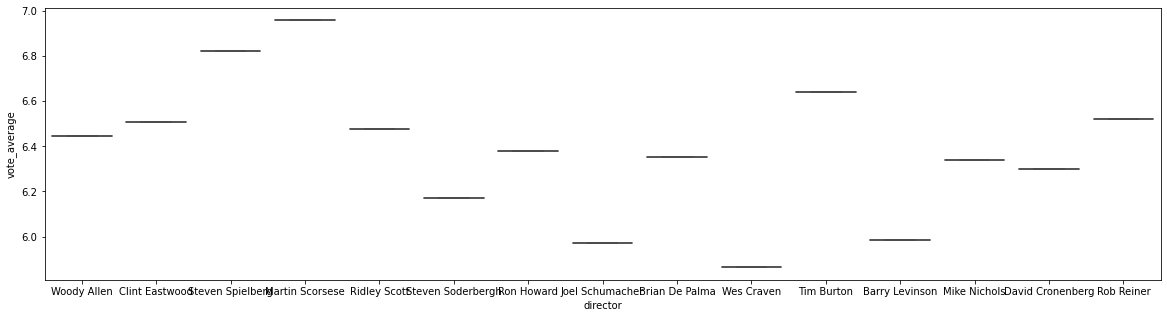

In [203]:
plt.figure(figsize=(20,5))
sns.boxplot(df_dir_top.director, df_dir_top.vote_average, color = 'orange');

In [136]:
df_dir_clean[df_dir_clean['number_of_title'] > 10
            ].sort_values(by = 'vote_average', ascending = False)

,director,number_of_title,vote_average
3898,Quentin Tarantino,11,7.35
4943,Wes Anderson,12,7.23
3800,Peter Jackson,13,7.00
3175,Martin Scorsese,29,6.96
1031,Danny Boyle,11,6.89
...,...,...,...
4233,Russell Mulcahy,14,5.59
4125,Robert Rodriguez,14,5.54
4747,Tobe Hooper,12,5.37
4616,Stuart Gillard,11,4.95


In [144]:
df_cast_clean.to_csv('cast.csv', index = False)

In [145]:
df_dir_clean.to_csv('director.csv', index = False)

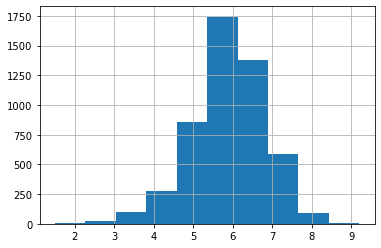

In [153]:
df_dir_clean['vote_average'].hist();

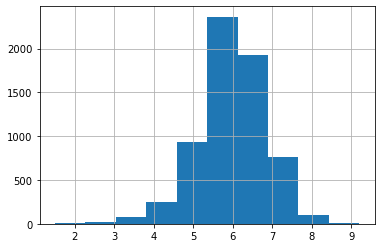

In [154]:
df_cast_clean['vote_average'].hist();

In [163]:
df_genre.head(1)

,genres,original_title,vote_average
0,Action|Adventure|Science Fiction|Thriller,Jurassic World,6.50


In [160]:
df_genre = df[['genres','original_title','vote_average']]

In [159]:
df.head(1)

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month
0,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.00,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,6


In [164]:
df_genre = df_genre.drop('genres', axis=1).join(df_genre['genres'].str.split('|', expand = True).stack().rename('genres').reset_index(drop = True))

In [165]:
df_genre.head(1)

,original_title,vote_average,genres
0,Jurassic World,6.50,Action


In [ ]:
df_dir3 = df_dir.groupby('director')['vote_average'].mean().to_frame(name = 'vote_average').reset_index()

In [167]:
df_genre2 = df_genre.groupby('genres')['original_title'].count().to_frame(name = 'number_of_title').reset_index()

In [168]:
df_genre3 = df_genre.groupby('genres')['vote_average'].mean().to_frame(name = 'vote_average').reset_index()

In [169]:
df_genre_clean = df_genre2.merge(df_genre3, how = 'outer')

In [175]:
df_genre_clean.sort_values(by = 'vote_average', ascending = False)

,genres,number_of_title,vote_average
1,Adventure,567,6.08
19,Western,39,6.07
12,Music,150,6.04
18,War,109,6.02
8,Fantasy,367,6.01
0,Action,947,6.00
10,History,127,6.00
11,Horror,668,6.00
13,Mystery,323,6.00
3,Comedy,1494,5.99


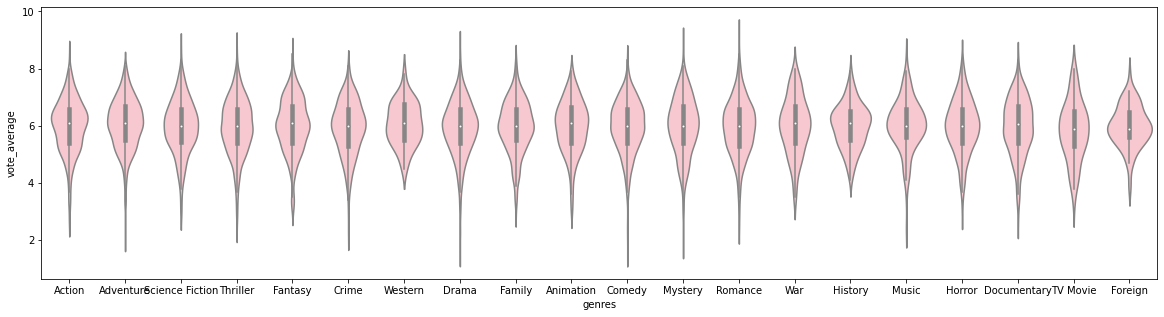

In [185]:
plt.figure(figsize=(20,5))
sns.violinplot(df_genre_com.genres, df_genre_com.vote_average, innter = 'quartile', color = 'pink');

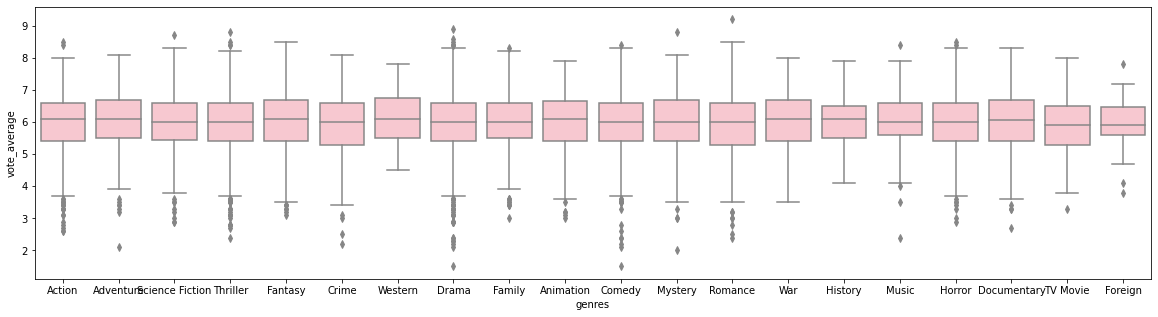

In [187]:
plt.figure(figsize=(20,5))
sns.boxplot(df_genre_com.genres, df_genre_com.vote_average, color = 'pink');

In [179]:
df_genre_com = df.drop('genres', axis=1).join(df['genres'].str.split('|', expand = True).stack().rename('genres').reset_index(drop = True))


### genre doesn't give much difference

In [180]:
df_genre_com.head()

,popularity,budget,revenue,original_title,cast,director,keywords,runtime,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,release_month,genres
0,32.99,150000000.00,1513528810.00,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,monster|dna|tyrannosaurus rex|velociraptor|island,124.00,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,6,Action
1,28.42,150000000.00,378436354.00,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,future|chase|post-apocalyptic|dystopia|australia,120.00,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49,5,Adventure
2,13.11,110000000.00,295238201.00,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,based on novel|revolution|dystopia|sequel|dyst...,119.00,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41,3,Science Fiction
3,11.17,200000000.00,2068178225.00,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,android|spaceship|jedi|space opera|3d,136.00,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80,12,Thriller
4,9.34,190000000.00,1506249360.00,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,car race|speed|revenge|suspense|car,137.00,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47,4,Action
